In [1]:
"""
A pulser program looks like this:
1 - Define a register of qubits
2 - Define a pulse sequence
3 - Run the sequence (emulator or on QPU)
4 - Get results and analyse
"""

'\nA pulser program looks like this:\n1 - Define a register of qubits\n2 - Define a pulse sequence\n3 - Run the sequence (emulator or on QPU)\n4 - Get results and analyse\n'

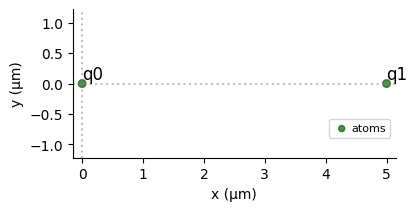

In [ ]:
from pulser import Register

# A register is defined by atom label and its position in 2D
register = Register({
    "q0": [0, 0],
    "q1": [5, 0],
})
register.draw()

# Coordinates are expressed in micrometers

In [11]:
from pulser import Sequence
from pulser.devices import MockDevice
# MockDevice is like a fake QPU without restrictions
# on parameters (like how close qubits are, size of register, etc.)


sequence = Sequence(register, MockDevice)

# Right now the sequence is empty, there are no pulses

In [4]:
from pulser import Pulse, waveforms

# A pusle needs 3 things:
# 1 - Amplitude / Rabi frequency / Omega
# 2 - Detuning / Delta
# 3 - Phase (but it's always going to be 0 for us)

amp_wf = waveforms.ConstantWaveform(
    duration = 10000, # nanoseconds
    value = 4, # measured in radians/microseconds
)

det_wf = waveforms.ConstantWaveform(
    10000,
    0,
)

pulse = Pulse(
    amplitude = amp_wf,
    detuning = det_wf, 
    phase = 0,
)

In [12]:
# Next need to declare a laser channel
# and then we associate the pulse to the laser channel

sequence.declare_channel(
    name = "ch", # you choose it
    channel_id = "rydberg_global", # this means that the laser is goign to be acting on all atoms simultaneously
)

sequence.add(
    pulse = pulse,
    channel = "ch"
)


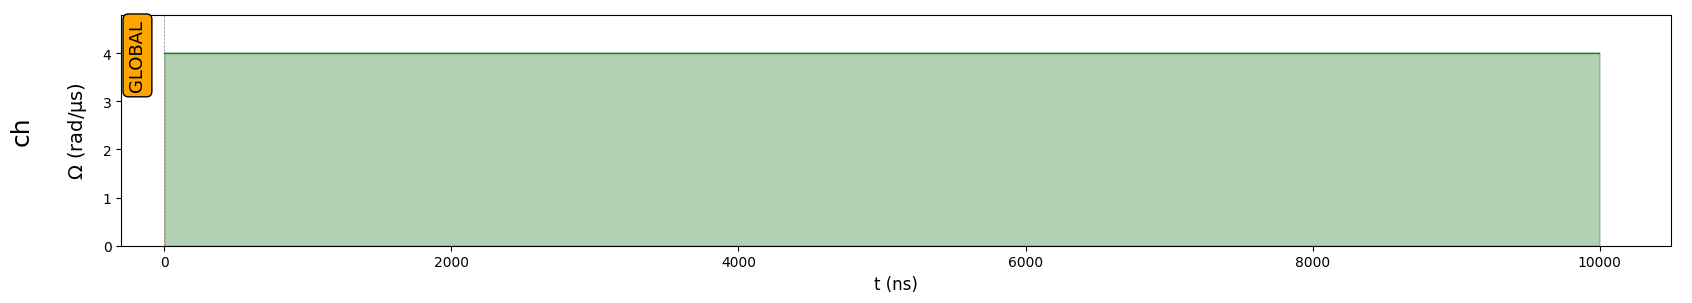

In [13]:
sequence.draw()

In [14]:
# now run the sequence to simulate the quantum evolution

from pulser_simulation import QutipEmulator

simulation = QutipEmulator.from_sequence(sequence)
results = simulation.run()

In [15]:
samples = results.sample_final_state(N_samples=1000)

In [16]:
samples

Counter({'00': 999, '01': 1})

In [ ]:
# Useful functions:

pulse1 = Pulse.ConstantAmplitude(
    amplitude = #some number,
    detuning = #some waveform
    phase = 0,
)

pulse2 = Pulse.ConstantPulse(
    duration = # some number
    amplitude = # some number
    detuning = # some number
    phase = 0
)


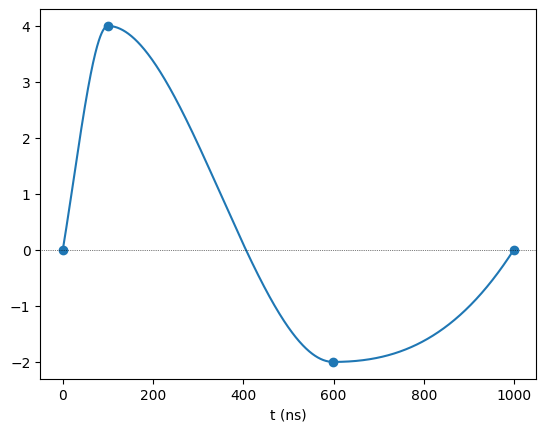

In [18]:
wf1 = waveforms.InterpolatedWaveform(
    duration = 1000,
    values = [0, 4, -2, 0],
    times = [0, 0.1, 0.6, 1]
)

wf1.draw()